In [1]:
##### Read cleaned combined data 
###### Final Version
# Dependencies

import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress

from matplotlib import pyplot as plt

from random import seed
from random import randint

# Time calculations
import time
import datetime
# from datetime import datetime
from time import strftime

# Printing and Output Controls
import sys
import os,csv

Output_Data_Path_Folder = "../Output" 

In [2]:
stock_df = pd.read_csv('../Data/Combined GME ALL 12_1_2_2.csv')
comment_df = pd.read_csv('../Data/12_1_to_2_2_hourly.csv')
stock_df = stock_df.rename(columns={'time':'Date'})
#Formatting the dates and times to be the same
stock_df['Date'] = [datetime.datetime.strptime(i, '%m/%d/%Y %H:00').strftime('%m/%d/%Y %H:00')for i in stock_df['Date']]
comment_df['Date'] = [datetime.datetime.strptime(i, '%m/%d/%Y %H:00').strftime('%m/%d/%Y %H:00')for i in comment_df['Date']]
comment_df = comment_df[['Date','# of Comments']]

In [3]:
#Merging our data to match comments and stock price based on the day and hour
merged_df = pd.merge(stock_df,comment_df,how='outer',on='Date')
clean_df = merged_df[merged_df['open'].notna()]
clean_df = clean_df.fillna(0)

In [4]:
# Set up output path 
# Output_Data_Path_Folder = "../Output" 
# Reddit_Data_Input_Path = "../Data/Clean Data_with new comments-EOClean.csv"

In [5]:
# read in the csv created in the WeatherPy section
# combined_data_df = pd.read_csv(Reddit_Data_Input_Path,dtype="object", encoding="latin")

In [6]:
combined_data_df=clean_df

In [7]:
# Check data
print(combined_data_df.count())
print(combined_data_df.dtypes)

Date             646
open             646
high             646
low              646
close            646
volume           646
# of Comments    646
dtype: int64
Date              object
open             float64
high             float64
low              float64
close            float64
volume           float64
# of Comments    float64
dtype: object


In [8]:
# Fix data types and create Date_Object for plotting
# combined_data_df[['open','high','low','close','volume','# of Comments']] = combined_data_df[['open','high','low','close','volume','# of Comments (Hourly)']].astype(float)
combined_data_df["Date_Object"] = pd.to_datetime(combined_data_df["Date"])

In [9]:
# Add calculation of change in the hour
combined_data_df["Change"] = combined_data_df["close"] - combined_data_df["open"]
combined_data_df["Abs_Change"] = abs(combined_data_df["Change"]) 

In [10]:
# Check data again
print(combined_data_df.dtypes)
combined_data_df

Date                     object
open                    float64
high                    float64
low                     float64
close                   float64
volume                  float64
# of Comments           float64
Date_Object      datetime64[ns]
Change                  float64
Abs_Change              float64
dtype: object


,Date,open,high,low,close,volume,# of Comments,Date_Object,Change,Abs_Change
0,02/01/2021 20:00,186.6500,198.9900,186.65,189.52,398808.0,533.0,2021-02-01 20:00:00,2.8700,2.8700
1,02/01/2021 19:00,178.0000,190.0000,177.00,187.75,495863.0,664.0,2021-02-01 19:00:00,9.7500,9.7500
2,02/01/2021 18:00,207.9600,208.7900,173.00,178.00,1577886.0,882.0,2021-02-01 18:00:00,-29.9600,29.9600
3,02/01/2021 17:00,225.4600,231.0000,206.00,207.55,626967.0,1080.0,2021-02-01 17:00:00,-17.9100,17.9100
4,02/01/2021 16:00,240.1096,240.1096,214.66,227.00,4599470.0,1159.0,2021-02-01 16:00:00,-13.1096,13.1096
...,...,...,...,...,...,...,...,...,...,...
641,12/01/2020 09:00,17.1100,17.4000,17.05,17.21,125719.0,0.0,2020-12-01 09:00:00,0.1000,0.1000
642,12/01/2020 08:00,17.4000,17.4000,17.00,17.06,44953.0,0.0,2020-12-01 08:00:00,-0.3400,0.3400
643,12/01/2020 07:00,17.5700,17.5700,17.40,17.41,4334.0,0.0,2020-12-01 07:00:00,-0.1600,0.1600
644,12/01/2020 06:00,17.5000,17.6500,17.44,17.48,12780.0,0.0,2020-12-01 06:00:00,-0.0200,0.0200


In [11]:
# Sort the data so it is ascending (otherwise plots "backwards", oldest data first)
combined_data_df.sort_values(by=["Date_Object"],inplace=True)


Line graphs for GME Stock Price Close by Date




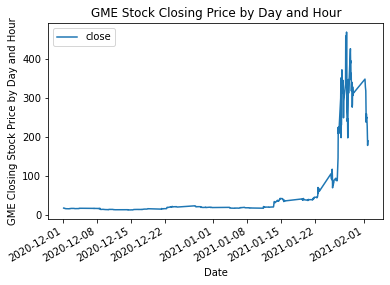

In [12]:
print(f"Line graphs for GME Stock Price Close by Date\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='Date_Object', y="close", kind="line",title=f"GME Stock Closing Price by Day and Hour")

plt.ylabel("GME Closing Stock Price by Day and Hour")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_1200_By_Date_Hour.png'))
plt.show()

Line graphs for Reddit Message Volume by Date




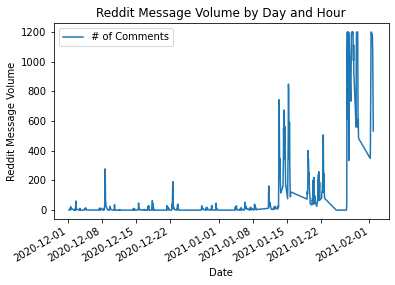

In [13]:
print(f"Line graphs for Reddit Message Volume by Date\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='Date_Object', y="# of Comments", kind="line",title=f"Reddit Message Volume by Day and Hour")

plt.ylabel("Reddit Message Volume")
plt.xlabel("Date")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'Reddit_Msg_Vol_By_Date_Hour_1200.png'))
plt.show()

Scatter Plot GME Stock Price Close by Message Volume




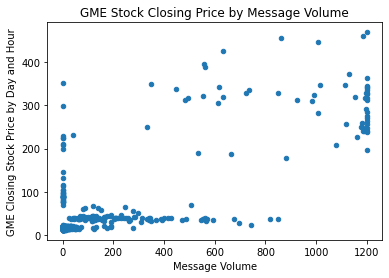

In [14]:
print(f"Scatter Plot GME Stock Price Close by Message Volume\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='# of Comments', y="close", kind="scatter",title=f"GME Stock Closing Price by Message Volume")

plt.ylabel("GME Closing Stock Price by Day and Hour")
plt.xlabel("Message Volume")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_Close_vs_Msg_Vol_per_Hour_1200.png'))
plt.show()

Scatter Plot GME Stock Price Change by Message Volume




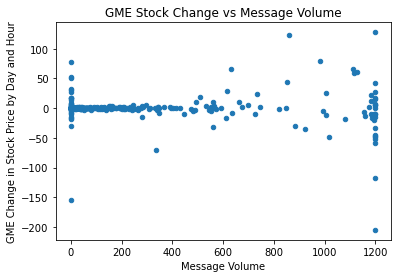

In [15]:
print(f"Scatter Plot GME Stock Price Change by Message Volume\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='# of Comments', y="Change", kind="scatter",title=f"GME Stock Change vs Message Volume")

plt.ylabel("GME Change in Stock Price by Day and Hour")
plt.xlabel("Message Volume")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_Change_vs_Msg_Vol_per_Hour_1200.png'))
plt.show()

Scatter Plot GME Stock Price Absolute Change by Message Volume




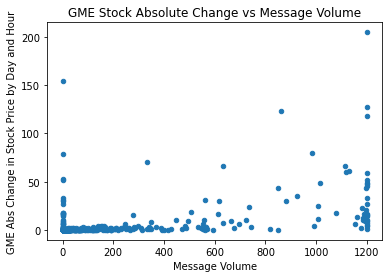

In [16]:
print(f"Scatter Plot GME Stock Price Absolute Change by Message Volume\n\n") 
Stock_Data_Graph = combined_data_df.plot(x='# of Comments', y="Abs_Change", kind="scatter",title=f"GME Stock Absolute Change vs Message Volume")

plt.ylabel("GME Abs Change in Stock Price by Day and Hour")
plt.xlabel("Message Volume")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Combined_abs_Change_vs_Msg_Vol_per_Hour_1200.png'))
plt.show()

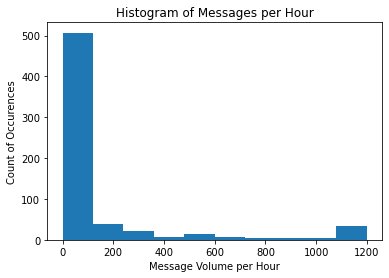

In [17]:
######  Reduce the data by eliminating noise
# First do a histogram
# print(f"Histogram of Message Volume\n\n") 
message_histogram = plt.hist(combined_data_df["# of Comments"]) 

plt.ylabel("Count of Occurences")
plt.xlabel("Message Volume per Hour")
# Write out to png file
plt.title("Histogram of Messages per Hour")
plt.savefig(os.path.join(Output_Data_Path_Folder,'Combined_Hist_Msg_Vol_per_Hour_1200.png'))
plt.show()

In [18]:
# restrict the number of message hours to eliminate the low noise and the 1200 wall 
Message_Subset = combined_data_df[(((combined_data_df["# of Comments"]) > 0) & ((combined_data_df["# of Comments"]) < 1200))]

Scatter Plot GME Stock Price Absolute Change by Message Volume




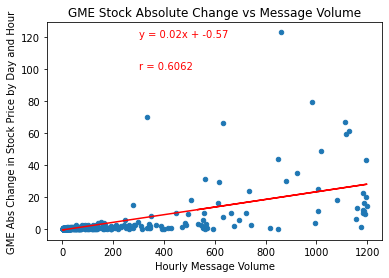

In [19]:
print(f"Scatter Plot GME Stock Price Absolute Change by Message Volume\n\n") 
Stock_Data_Graph = Message_Subset.plot(x='# of Comments', y="Abs_Change", kind="scatter",title=f"GME Stock Absolute Change vs Message Volume")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Message_Subset["# of Comments"],Message_Subset["Abs_Change"])
regress_values = Message_Subset["# of Comments"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
R_value = "r = " + str(round(rvalue,4))
plt.plot(Message_Subset["# of Comments"],regress_values,"r-")
plt.annotate(line_eq,(300,120),fontsize=10,color="red",rotation=0)
plt.annotate(R_value,(300,100),fontsize=10,color="red", rotation = 0)

plt.ylabel("GME Abs Change in Stock Price by Day and Hour")
plt.xlabel("Hourly Message Volume")
# Write out to png file
plt.savefig(os.path.join(Output_Data_Path_Folder,'GME_Subset_abs_Change_vs_Msg_Vol_per_Hour_1200.png'))
plt.show()

In [20]:
#Adding a Day column to group by day, ignoring the hour
days = [v.split()[0] for i, v in Message_Subset['Date'].items()]
Message_Subset['Day']= days
#Getting a series of the r values for each day
r_value_days = Message_Subset.groupby('Day')[['# of Comments','Abs_Change']].corr().iloc[0::2,-1]

<ipython-input-20-78473f429a73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Message_Subset['Day']= days


Ttest_1sampResult(statistic=4.020165701385323, pvalue=0.0002659770884780948)

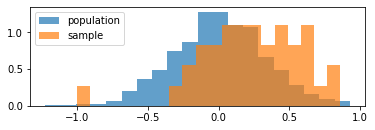

In [21]:
#Generate our population to match our null hypothesis
population = st.norm.rvs(loc=0,scale=0.32,size=1000)
#Our observed sample
sample = r_value_days.values

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="population")
plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
plt.legend()  

    
    
st.ttest_1samp(sample, population.mean())
#Since we get a p-value < 0.5, we reject the null hypothesis